1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('..//data//iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [9]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Mediante knn, predice qué planta se corresponde con los ejemplos: [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3] para k=3 y k=7
### ¿Qué acierto tiene tu modelo para k=3, k=7? (score=Accuracy)

###     K = 3

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [16]:
predicted = knn.predict([[15.7,2.8,9.5,0.1]])
print(predicted)

['Virginica']


In [17]:
predicted = knn.predict([[1.7,3.8,4.5,11.3]])
print(predicted)

['Virginica']


### K = 7

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [19]:
predicted = knn.predict([[15.7,2.8,9.5,0.1]])
print(predicted)

['Virginica']


In [22]:
predicted = knn.predict([[1.7,3.8,4.5,11.3]])
print(predicted)

['Virginica']


### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

([<matplotlib.axis.XTick at 0x14401d13b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

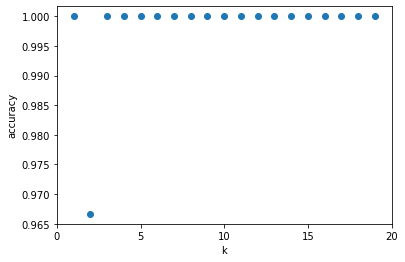

In [25]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

- Cualquier k entre 1 y 20, exceptuando k = 2, hace obtener un score del 100%

### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


- El score es más bajo porque no tiene lógica que el conjunto test sea mayor que el conjunto train

### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [28]:
df = df[df['variety'] != 'Setosa']
df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [30]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [34]:
predicted1 = knn.predict([[15.7,2.8,9.5,0.1]])
predicted2 = knn.predict([[1.7,3.8,4.5,11.3]])
print('predicted_1', predicted1, '\n\npredicted_2', predicted2)

predicted_1 ['Virginica'] 

predicted_2 ['Virginica']


([<matplotlib.axis.XTick at 0x1440bda5b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

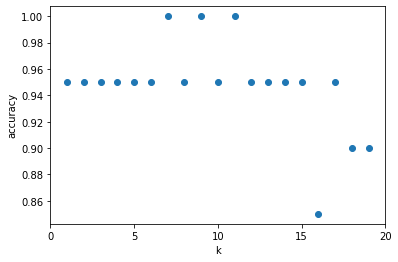

In [33]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

- Los resultados han cambiado poco pero se puede apreciar la diferencia del modelo al comparar las gráficas k-scores, ahora solo contamos con 3 posibles k´s que den un 100% de accuracy
Estas k son 7, 9 y 11

### ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

- Si, lo considero un buen algoritmo porque hemos obtenido unos scores altísimos y ha predecido bien los valores.
- Además, es un dataset pequeño y knn funciona mejor con estos